# Question 4

In [54]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
# from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [55]:
# Do not change this cell
image = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)

In [56]:
def Add_Noise(image, noise_amount):
    """
    Add salt and pepper noise to the input image.

    Parameters:
      image: Input image (numpy array).
      noise_amount: Proportion of pixels to be affected by noise (default is 0.05).
    
    Returns:
      Image with salt and pepper noise added.
    """
    noisy_image = np.copy(image)

    # Generate random coordinates for salt and pepper noise
    rows, cols = noisy_image.shape
    num_pixels = int(rows * cols * noise_amount)

    # Add salt noise (white pixels)
    salt_coords = [np.random.randint(0, i - 1, num_pixels) for i in (rows, cols)]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    # Add pepper noise (black pixels)
    pepper_coords = [np.random.randint(0, i - 1, num_pixels) for i in (rows, cols)]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image


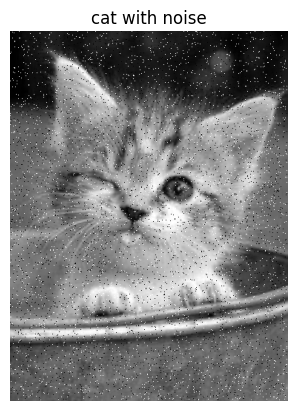

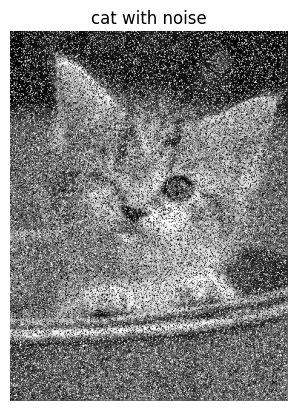

In [57]:
noise_amount = 0.02

noisy_image = Add_Noise(image, noise_amount)
plt.imshow(noisy_image, cmap='gray')
plt.title("cat with noise")
plt.axis("off")
plt.show()

noise_amount = 0.2

noisy_image = Add_Noise(image, noise_amount)
plt.imshow(noisy_image, cmap='gray')
plt.title("cat with noise")
plt.axis("off")
plt.show()

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [58]:
def Reflect101(img, filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  # Extracting filter dimensions
  filter_height = filter_size
  filter_width = filter_size
  
  # Compute the padding required on each side
  pad_height = filter_height // 2
  pad_width = filter_width // 2
  
  # Pad the image with reflection padding
  padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')  

  return padded_image

In [59]:
my_padded_image = Reflect101(image, 15)

# Get image dimensions
image_height, image_width = image.shape
print('image_height:', image_height, 'image_width:', image_width)

# Get padded image dimensions
padded_image_height, padded_image_width = my_padded_image.shape
print('padded_image_height:', padded_image_height, 'padded_image_width:', padded_image_width)


image_height: 500 image_width: 375
padded_image_height: 514 padded_image_width: 389


In [60]:
def Averaging_Blurring(img, filter_size):
    '''
    Averaging blurring filter implementation without using libraries.
    
    Parameters:
      img (ndarray): input image
      filter_size (tuple): filter size
      
    Returns:
      result (ndarray): computed averaging blurring
    '''
    # Reflect101 padding
    image = Reflect101(img, filter_size)
    
    # Initialize result array
    result = np.zeros_like(img)
    
    # Compute averaging blurring
    filter_height =filter_size
    filter_width = filter_size
    
    for i in range(result.shape[0]):
      for j in range(result.shape[1]):
        result[i, j] = np.mean(image[i:i+filter_height, j:j+filter_width])
    
    # # Calculate the sum of the pixel values in each filter region
    # filtered_image = np.cumsum(np.cumsum(image, axis=0), axis=1)
    # filtered_image -= np.cumsum(np.cumsum(image[:,:-filter_width], axis=0), axis=1)
    # filtered_image -= np.cumsum(np.cumsum(image[:-filter_height,:], axis=0), axis=1)
    # filtered_image += np.cumsum(np.cumsum(image[:-filter_height,:-filter_width], axis=0), axis=1)
    
    # # Calculate the average pixel value in each filter region
    # result = (filtered_image[filter_height:,filter_width:] - filtered_image[:-filter_height,filter_width:] - 
    #           filtered_image[filter_height:,:-filter_width] + filtered_image[:-filter_height,:-filter_width]) / (filter_height * filter_width)
  
    return result


In [61]:
def Median_Blurring(img, filter_size):
    '''
    Median blurring filter implementation without using libraries.
    
    Parameters:
      img (ndarray): input image
      filter_size (tuple): filter size
      
    Returns:
      result (ndarray): computed median blurring
    '''
    # Reflect101 padding
    image = Reflect101(img, filter_size)
    
    # Compute filter dimensions
    filter_height = filter_size
    filter_width = filter_size
    
    # Calculate the median pixel value in each filter region
    result = np.median(np.array([
        [
          image[i:i+filter_height, j:j+filter_width]
          for j in range(image.shape[1] - filter_width + 1)
        ]
        for i in range(image.shape[0] - filter_height + 1)
    ]), axis=(2, 3))
    
    # By specifying axis=(2, 3), we're essentially telling NumPy to calculate the median across 
    # the height and width dimensions of each filter region. 
    
    return result


In [62]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Gaussian blurring filter implementation without using libraries.
    
    Parameters:
      img (ndarray): input image
      filter_size (int): filter size (assumed to be square)
      std (float): standard deviation of Gaussian kernel
      
    Returns:
      result (ndarray): computed Gaussian blurring
    '''
    # Compute the kernel size
    kernel_radius = filter_size // 2
    
    # Generate Gaussian kernel
    x = np.arange(-kernel_radius, kernel_radius + 1)
    y = np.arange(-kernel_radius, kernel_radius + 1)
    xx, yy = np.meshgrid(x, y)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * std**2)) / (2 * np.pi * std**2)
    kernel /= np.sum(kernel)  # Normalize the kernel
    
    # Reflect101 padding
    output = Reflect101(img, filter_size)
    
    # Apply Gaussian blur using convolution
    result = np.zeros_like(img)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i, j] = np.sum(output[i:i+filter_size, j:j+filter_size] * kernel)
    
    return result


(-0.5, 374.5, 499.5, -0.5)

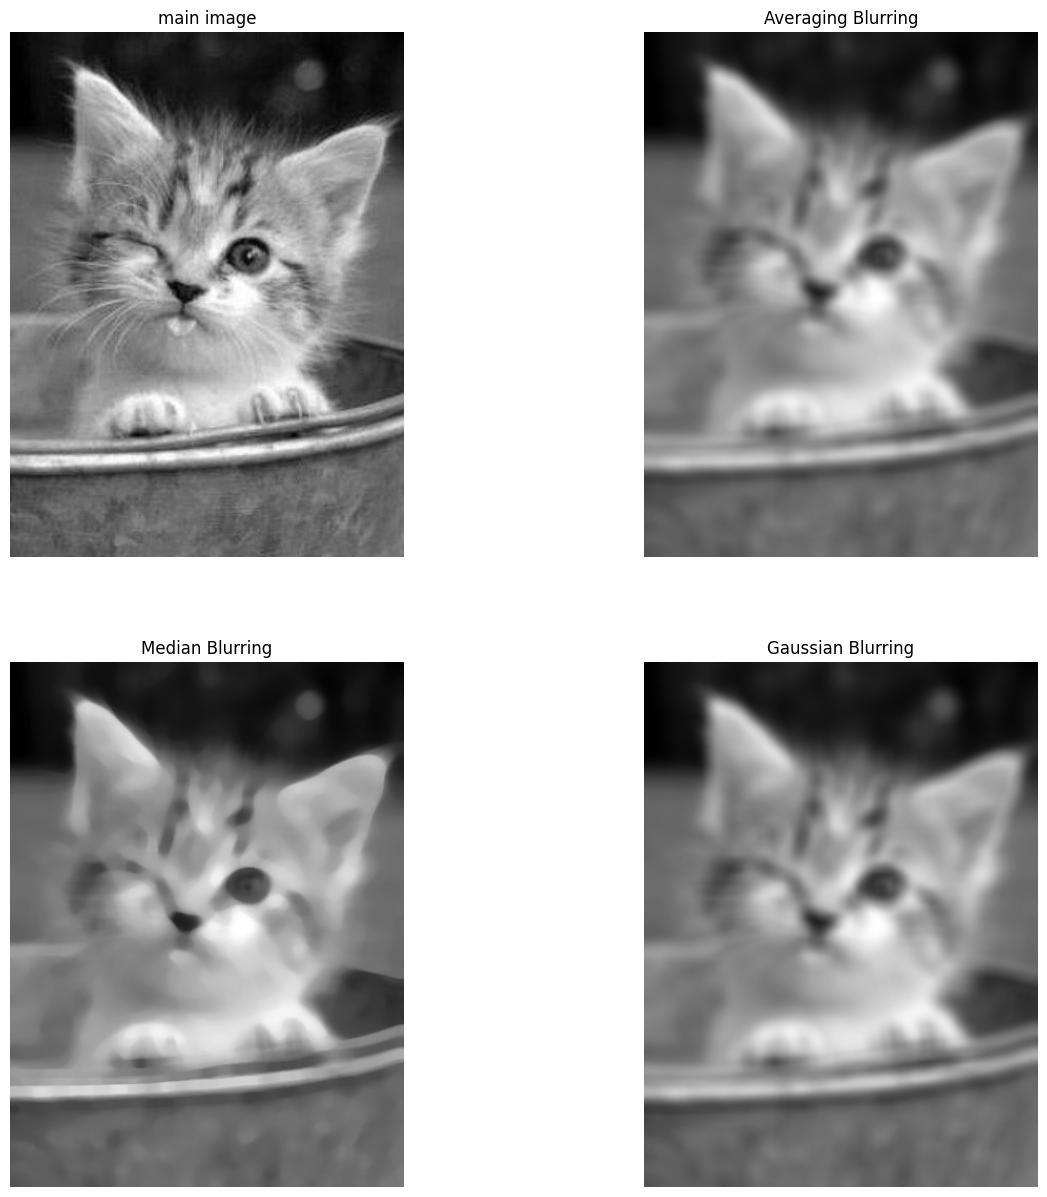

In [63]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")


## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [65]:
filter_size = 15
std = 40

AveragingBlurring = cv2.blur(image, (filter_size, filter_size))
MedianBlurring = cv2.medianBlur(image, filter_size)
GaussianBlurring = cv2.GaussianBlur(image, (filter_size, filter_size), std)

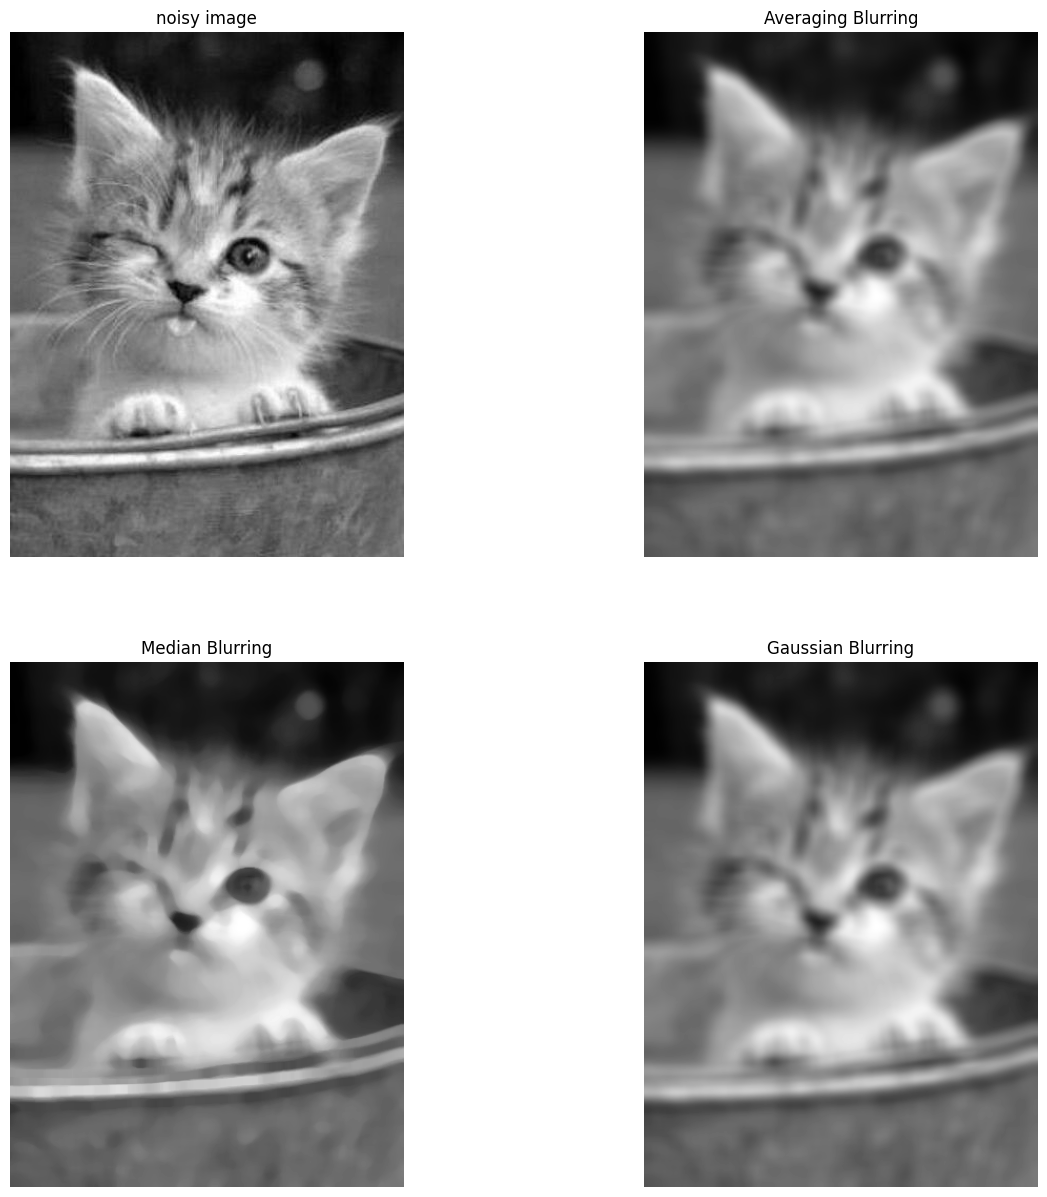

In [66]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i], cmap='gray')
  plt.title(titles[i])
  plt.axis("off")

Laplacian

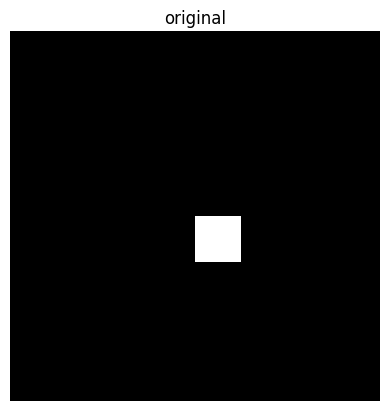

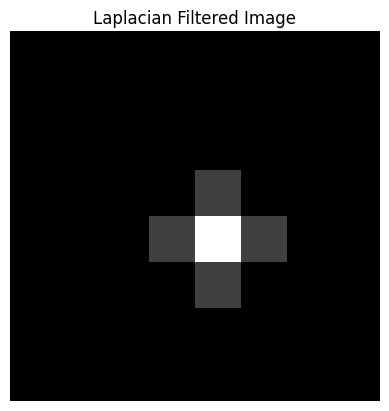

image: [[10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 12 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10]]
Laplacian image: [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 8. 2. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [72]:

image = np.full((8, 8), 10, dtype=np.uint8)
image[4, 4] = 12

laplacian_image = np.zeros((8, 8))
laplacian_image[3, 4] = 2
laplacian_image[4, 3] = 2
laplacian_image[4, 5] = 2
laplacian_image[5, 4] = 2
laplacian_image[4, 4] = 8

plt.imshow(image, cmap='gray')
plt.title("original")
plt.axis("off")
plt.show()

plt.imshow(laplacian_image, cmap='gray')
plt.title("Laplacian Filtered Image")
plt.axis("off")

plt.show()

print('image:', image)
print('Laplacian image:', laplacian_image)